Mighty Big Problem

Part A

In [1]:
#Import needed modules/libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Constants to use throughout the code
#Includes all planetary information, like masses, eccentricity, etc
#Also have number of orbits and steps (per orbit) to control and manipulate in code later
#Also define initial conditions for all planets 
numOrbits=691
steps=50000


G = 6.67430*10**-11*(31536000)**2*(1/149597870691**3)
m_sun = 1.98844*10**30

m_mercury = 3.30104*10**23
period_mercury = .2408425
sma_mercury = 0.387098261 
e_mercury = 0.20563593 

m_jupiter = 1.89813 * 10**27
e_jupiter = 0.04838624
sma_jupiter = 5.20287342
period_jupiter=11.862409

m_saturn=5.68319 * 10**26
period_saturn = 29.446986
e_saturn=0.05386179 
sma_saturn=9.536651047


m_venus=4.86732*10**24
period_venus=0.6151866
e_venus=0.00677672
sma_venus=0.723333771

m_earth=5.97219*10**24
period_earth=1.00
e_earth=0.01671123
sma_earth=1.00

m_mars=6.41693*10**23
period_mars=1.8808149
e_mars=0.0933941
sma_mars=1.523706365

xma0=sma_mars*(1-e_mars)
yma0=0
vxma0=0
vyma0= np.sqrt(((1+e_mars)*G*m_sun)/(xma0))

xe0=sma_earth*(1-e_earth)
ye0=0
vxe0=0
vye0= np.sqrt(((1+e_earth)*G*m_sun)/(xe0))

xv0=sma_venus*(1-e_venus)
yv0=0
vxv0=0
vyv0= np.sqrt(((1+e_venus)*G*m_sun)/(xv0))

xs0=sma_saturn*(1-e_saturn)
ys0=0
vxs0=0
vys0= np.sqrt(((1+e_saturn)*G*m_sun)/(xs0))

xj0=sma_jupiter*(1-e_jupiter)
yj0=0
vxj0=0
vyj0= np.sqrt(((1+e_jupiter)*G*m_sun)/(xj0))

x0 = sma_mercury*(1-e_mercury)
y0 = 0
vx0 = 0
vy0 = np.sqrt(((1+e_mercury)*G*m_sun)/(x0))

In [3]:
#Define perigee tracker peritrack
stepsn=int(steps/2)
def peritrack(a,sol):
    orbit_groupsx=np.array_split(sol[stepsn:-stepsn,1],a-1)
    orbit_groupsy=np.array_split(sol[stepsn:-stepsn,3],a-1)
    x_min = 0
    y_min = 0 
    x_perigee = []
    y_perigee = []
    x_perigee.append(sol[0,1])
    y_perigee.append(sol[0,3])
    for j in range(a-1):
        min_dis=sma_mercury
        arrayx=orbit_groupsx[j]
        arrayy=orbit_groupsy[j]
        for i in range(len(arrayx)):
            if (min_dis > np.sqrt(arrayx[i]**2+arrayy[i]**2)): 
                min_dis=np.sqrt(arrayx[i]**2+arrayy[i]**2)
                x_min=arrayx[i]
                y_min=arrayy[i]
        x_perigee.append(x_min)
        y_perigee.append(y_min)
    perigee=np.column_stack((x_perigee,y_perigee))  
    return perigee                  

In [4]:
#Function returning our derivatives for mass and sun system
def mbp1(r,t,G,Ms):
    vx=r[0]
    x=r[1]
    vy=r[2]
    y=r[3]
    
    return (-G*Ms*x)/(np.sqrt(x**2+y**2)**3),vx,(-G*Ms*y)/(np.sqrt(x**2+y**2)**3),vy

In [5]:
#Define timestep for odeint
t = np.linspace(0,numOrbits*period_mercury,numOrbits*steps)

#Define initial condtions array
ic=(vx0,x0,vy0,y0)

#Define sol array as solution from odeint
sol=odeint(mbp1,ic,t,args=(G,m_sun))

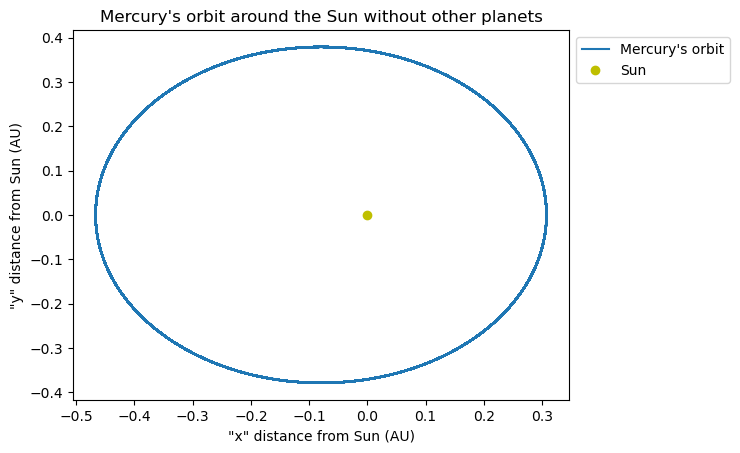

In [6]:
#Plot the sun and Mercury's orbit
plt.plot(sol[:,1],sol[:,3],label="Mercury's orbit")
plt.plot(0,0,'yo',label="Sun")


#Label the axes, add title, and legend
plt.xlabel('"x" distance from Sun (AU)')
plt.ylabel('"y" distance from Sun (AU)')
plt.title('Mercury\'s orbit around the Sun without other planets')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

In [7]:
#Track perigee precession for just mercury
perigeesm=peritrack(numOrbits,sol)

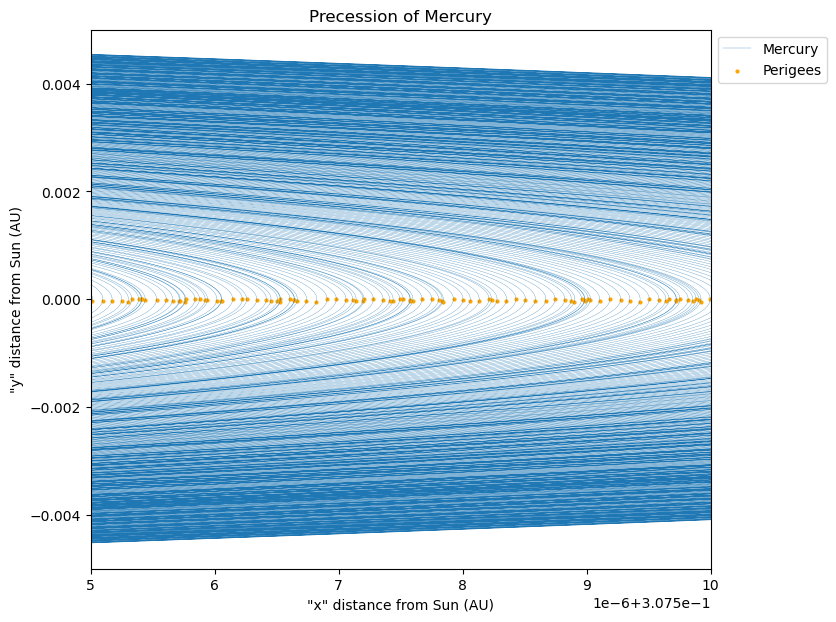

Precession rate per century = -22.905297453005968


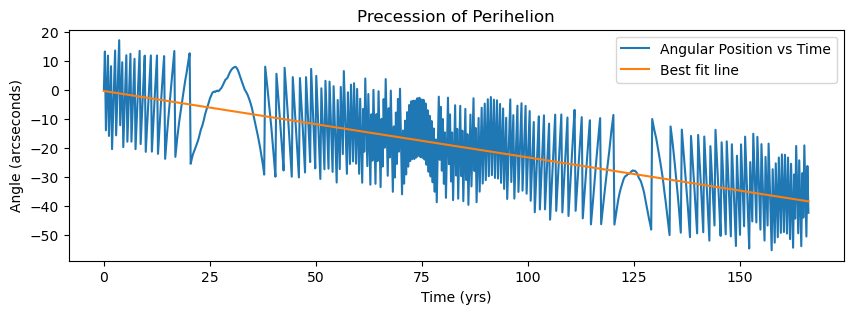

In [8]:
#Plot zoomed in orbit showing precession
plt.figure(figsize=(8,7))
plt.plot(sol[:,1],sol[:,3],label="Mercury",linewidth=.2)
plt.scatter(perigeesm[:,0],perigeesm[:,1],c='orange',s=4,label='Perigees')
plt.xlim(.307505,.30751)
plt.ylim(-.005,.005)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.xlabel('"x" distance from Sun (AU)')
plt.ylabel('"y" distance from Sun (AU)')
plt.title("Precession of Mercury")
plt.show()


# Convert perigees array to an array of their corresponding angular position in arcseconds
angles = np.degrees((np.arctan2(perigeesm[:, 1], perigeesm[:, 0]))) * 3600

# This time array makes it so each time step corresponds to a period
t1 = np.zeros(numOrbits)
for i in range(numOrbits):
    t1[i] = period_mercury * i

# Plot our angles versus time. Use polyfit function to make a best fit line.
# Our "c" will be the slope of our line, which will be in arcseconds per year, and the "b" will be the y intercept
plt.figure(figsize=(10,3))
plt.plot(t1, angles, label='Angular Position vs Time')
c, b = np.polyfit(t1, angles, 1)

# Plot the best fit line versus time
plt.plot(t1, c * t1 + b, label='Best fit line')

# Add title, axes labels, and legend
plt.title('Precession of Perihelion')
plt.xlabel('Time (yrs)')
plt.ylabel('Angle (arcseconds)')
plt.legend()

# Print the slope times 100, which will give precession per century, since the slope is precession per year
print('Precession rate per century = '+str(c * 100))

# Display the plot
plt.show()

Part B

In [9]:
%reset -f

In [10]:
#Import needed modules/libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

#Constants to use throughout the code
#Includes all planetary information, like masses, eccentricity, etc
#Also have number of orbits and steps (per orbit) to control and manipulate in code later
#Also define initial conditions for all planets 
numOrbits=691
steps=50000


G = 6.67430*10**-11*(31536000)**2*(1/149597870691**3)
m_sun = 1.98844*10**30

m_mercury = 3.30104*10**23
period_mercury = .2408425
sma_mercury = 0.387098261 
e_mercury = 0.20563593 

m_jupiter = 1.89813 * 10**27
e_jupiter = 0.04838624
sma_jupiter = 5.20287342
period_jupiter=11.862409

m_saturn=5.68319 * 10**26
period_saturn = 29.446986
e_saturn=0.05386179 
sma_saturn=9.536651047


m_venus=4.86732*10**24
period_venus=0.6151866
e_venus=0.00677672
sma_venus=0.723333771

m_earth=5.97219*10**24
period_earth=1.00
e_earth=0.01671123
sma_earth=1.00

m_mars=6.41693*10**23
period_mars=1.8808149
e_mars=0.0933941
sma_mars=1.523706365

xma0=sma_mars*(1-e_mars)
yma0=0
vxma0=0
vyma0= np.sqrt(((1+e_mars)*G*m_sun)/(xma0))

xe0=sma_earth*(1-e_earth)
ye0=0
vxe0=0
vye0= np.sqrt(((1+e_earth)*G*m_sun)/(xe0))

xv0=sma_venus*(1-e_venus)
yv0=0
vxv0=0
vyv0= np.sqrt(((1+e_venus)*G*m_sun)/(xv0))

xs0=sma_saturn*(1-e_saturn)
ys0=0
vxs0=0
vys0= np.sqrt(((1+e_saturn)*G*m_sun)/(xs0))

xj0=sma_jupiter*(1-e_jupiter)
yj0=0
vxj0=0
vyj0= np.sqrt(((1+e_jupiter)*G*m_sun)/(xj0))

x0 = sma_mercury*(1-e_mercury)
y0 = 0
vx0 = 0
vy0 = np.sqrt(((1+e_mercury)*G*m_sun)/(x0))

#Define perigee tracker peritrack
stepsn=int(steps/2)
def peritrack(a,sol):
    orbit_groupsx=np.array_split(sol[stepsn:-stepsn,1],a-1)
    orbit_groupsy=np.array_split(sol[stepsn:-stepsn,3],a-1)
    x_min = 0
    y_min = 0 
    x_perigee = []
    y_perigee = []
    x_perigee.append(sol[0,1])
    y_perigee.append(sol[0,3])
    for j in range(a-1):
        min_dis=sma_mercury
        arrayx=orbit_groupsx[j]
        arrayy=orbit_groupsy[j]
        for i in range(len(arrayx)):
            if (min_dis > np.sqrt(arrayx[i]**2+arrayy[i]**2)): 
                min_dis=np.sqrt(arrayx[i]**2+arrayy[i]**2)
                x_min=arrayx[i]
                y_min=arrayy[i]
        x_perigee.append(x_min)
        y_perigee.append(y_min)
    perigee=np.column_stack((x_perigee,y_perigee))  
    return perigee  

In [12]:
#Begin by adding Jupiter

In [13]:
#Define a function containing our derivatives for adding in Jupiter
def mbpJ (r, t, G, Ms, Mj, Mm):
    vxm=r[0]
    xm=r[1]
    vym=r[2]
    ym=r[3]
    vxj=r[4]
    xj=r[5]
    vyj=r[6]
    yj=r[7]
    
    return [(-G*Ms*xm)/(np.sqrt(xm**2+ym**2)**3)-(G*Mj*(xm-xj))/(np.sqrt((xm-xj)**2+(ym-yj)**2)**3),vxm,
           (-G*Ms*ym)/(np.sqrt(xm**2+ym**2)**3)-(G*Mj*(ym-yj))/(np.sqrt((xm-xj)**2+(ym-yj)**2)**3),vym,
           (-G*Ms*xj)/(np.sqrt(xj**2+yj**2)**3),vxj,
           (-G*Ms*yj)/(np.sqrt(xj**2+yj**2)**3),vyj ]

In [14]:
#Define initial conditions and time steps, and then use those with odeint to solve the system
#Define the solution array as sol1
ic1 = (vx0,x0,vy0,y0,vxj0,xj0,vyj0,yj0)
t = np.linspace(0,period_saturn,5*steps)
sol1=odeint(mbpJ,ic1,t,args=(G,m_sun,m_jupiter,m_mercury))

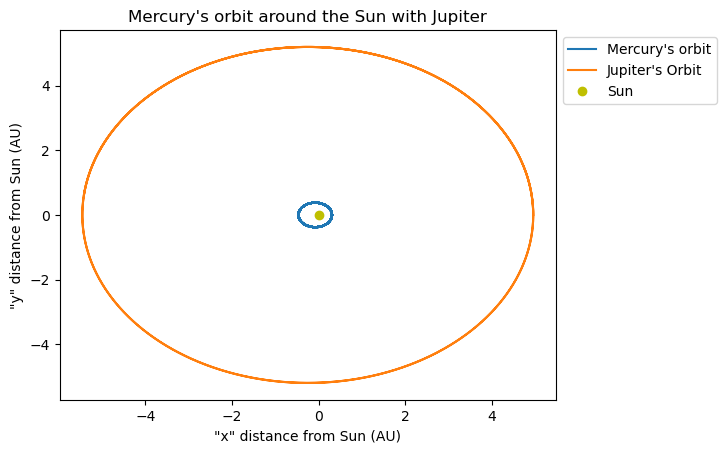

In [15]:
#Plot Jupiter, Mercury, and the Sun
plt.plot(sol1[:,1],sol1[:,3],label="Mercury's orbit")
plt.plot(sol1[:,5],sol1[:,7],label="Jupiter's Orbit")
plt.plot(0,0,'yo',label="Sun")


#Label the axes, add title, and legend
plt.xlabel('"x" distance from Sun (AU)')
plt.ylabel('"y" distance from Sun (AU)')
plt.title('Mercury\'s orbit around the Sun with Jupiter')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

In [16]:
#Define new timestep and resolve the system to get a better look at perihelion precession with Jupiter added
t = np.linspace(0,numOrbits*period_mercury,numOrbits*steps)
sol1=odeint(mbpJ,ic1,t,args=(G,m_sun,m_jupiter,m_mercury))

In [17]:
perigeesm=peritrack(numOrbits,sol1)

Precession rate per century = 147.3137312830094


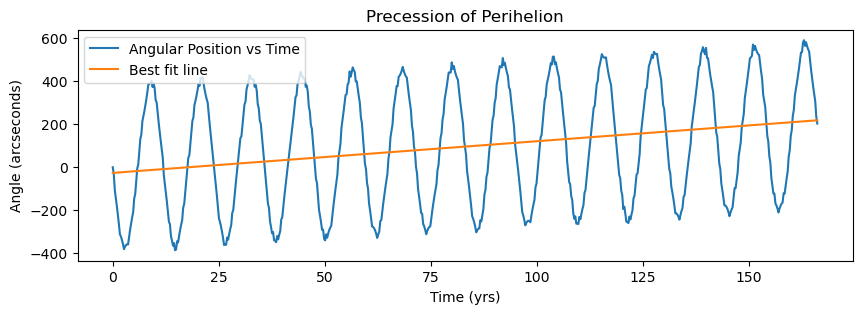

In [18]:
# Convert perigees array to an array of their corresponding angular position in arcseconds
angles = np.degrees((np.arctan2(perigeesm[:, 1], perigeesm[:, 0]))) * 3600

# This time array makes it so each time step corresponds to a period
t1 = np.zeros(numOrbits)
for i in range(numOrbits):
    t1[i] = period_mercury * i

# Plot our angles versus time. Use polyfit function to make a best fit line.
# Our "c" will be the slope of our line, which will be in arcseconds per year, and the "b" will be the y intercept
plt.figure(figsize=(10,3))
plt.plot(t1, angles, label='Angular Position vs Time')
c, b = np.polyfit(t1, angles, 1)

# Plot the best fit line versus time
plt.plot(t1, c * t1 + b, label='Best fit line')

# Add title, axes labels, and legend
plt.title('Precession of Perihelion')
plt.xlabel('Time (yrs)')
plt.ylabel('Angle (arcseconds)')
plt.legend()

# Print the slope times 100, which will give precession per century, since the slope is precession per year
print('Precession rate per century = '+str(c * 100))

# Display the plot
plt.show()

In [19]:
#Now add Saturn
%reset -f

In [20]:
#Import needed modules/libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

#Constants to use throughout the code
#Includes all planetary information, like masses, eccentricity, etc
#Also have number of orbits and steps (per orbit) to control and manipulate in code later
#Also define initial conditions for all planets 
numOrbits=691
steps=50000


G = 6.67430*10**-11*(31536000)**2*(1/149597870691**3)
m_sun = 1.98844*10**30

m_mercury = 3.30104*10**23
period_mercury = .2408425
sma_mercury = 0.387098261 
e_mercury = 0.20563593 

m_jupiter = 1.89813 * 10**27
e_jupiter = 0.04838624
sma_jupiter = 5.20287342
period_jupiter=11.862409

m_saturn=5.68319 * 10**26
period_saturn = 29.446986
e_saturn=0.05386179 
sma_saturn=9.536651047


m_venus=4.86732*10**24
period_venus=0.6151866
e_venus=0.00677672
sma_venus=0.723333771

m_earth=5.97219*10**24
period_earth=1.00
e_earth=0.01671123
sma_earth=1.00

m_mars=6.41693*10**23
period_mars=1.8808149
e_mars=0.0933941
sma_mars=1.523706365

xma0=sma_mars*(1-e_mars)
yma0=0
vxma0=0
vyma0= np.sqrt(((1+e_mars)*G*m_sun)/(xma0))

xe0=sma_earth*(1-e_earth)
ye0=0
vxe0=0
vye0= np.sqrt(((1+e_earth)*G*m_sun)/(xe0))

xv0=sma_venus*(1-e_venus)
yv0=0
vxv0=0
vyv0= np.sqrt(((1+e_venus)*G*m_sun)/(xv0))

xs0=sma_saturn*(1-e_saturn)
ys0=0
vxs0=0
vys0= np.sqrt(((1+e_saturn)*G*m_sun)/(xs0))

xj0=sma_jupiter*(1-e_jupiter)
yj0=0
vxj0=0
vyj0= np.sqrt(((1+e_jupiter)*G*m_sun)/(xj0))

x0 = sma_mercury*(1-e_mercury)
y0 = 0
vx0 = 0
vy0 = np.sqrt(((1+e_mercury)*G*m_sun)/(x0))

#Define perigee tracker peritrack
stepsn=int(steps/2)
def peritrack(a,sol):
    orbit_groupsx=np.array_split(sol[stepsn:-stepsn,1],a-1)
    orbit_groupsy=np.array_split(sol[stepsn:-stepsn,3],a-1)
    x_min = 0
    y_min = 0 
    x_perigee = []
    y_perigee = []
    x_perigee.append(sol[0,1])
    y_perigee.append(sol[0,3])
    for j in range(a-1):
        min_dis=sma_mercury
        arrayx=orbit_groupsx[j]
        arrayy=orbit_groupsy[j]
        for i in range(len(arrayx)):
            if (min_dis > np.sqrt(arrayx[i]**2+arrayy[i]**2)): 
                min_dis=np.sqrt(arrayx[i]**2+arrayy[i]**2)
                x_min=arrayx[i]
                y_min=arrayy[i]
        x_perigee.append(x_min)
        y_perigee.append(y_min)
    perigee=np.column_stack((x_perigee,y_perigee))  
    return perigee  

In [21]:
#Define the function for our system of ODE's with Jupiter and Saturn included
def mbpJS (r, t, G, Ms, Mj, Mm, Msa):
    vxm=r[0]
    xm=r[1]
    vym=r[2]
    ym=r[3]
    vxj=r[4]
    xj=r[5]
    vyj=r[6]
    yj=r[7]
    vxs=r[8]
    xs=r[9]
    vys=r[10]
    ys=r[11]
    
    
    return [ (-G*Ms*xm)/(np.sqrt(xm**2+ym**2)**3)-(G*Mj*(xm-xj))/(np.sqrt((xm-xj)**2+(ym-yj)**2)**3)-(G*Msa*(xm-xs))/np.sqrt(((xm-xs)**2+(ym-ys)**2)**3),vxm,
           (-G*Ms*ym)/(np.sqrt(xm**2+ym**2)**3)-(G*Mj*(ym-yj))/(np.sqrt((xm-xj)**2+(ym-yj)**2)**3)-(G*Msa*(ym-ys))/np.sqrt(((xm-xs)**2+(ym-ys)**2)**3),vym,
           (-G*Ms*xj)/(np.sqrt(xj**2+yj**2)**3),vxj,
           (-G*Ms*yj)/(np.sqrt(xj**2+yj**2)**3),vyj,
           (-G*Ms*xs)/(np.sqrt(xs**2+ys**2)**3),vxs,
           (-G*Ms*ys)/(np.sqrt(xs**2+ys**2)**3),vys]

In [22]:
#Define initial conditions, time steps, and use odeint to solve the system. Define sol2 as the solution array
ic1 = (vx0,x0,vy0,y0,vxj0,xj0,vyj0,yj0,vxs0,xs0,vys0,ys0)
t = np.linspace(0,period_saturn,5*steps)
sol2=odeint(mbpJS,ic1,t,args=(G,m_sun,m_jupiter,m_mercury,m_saturn))

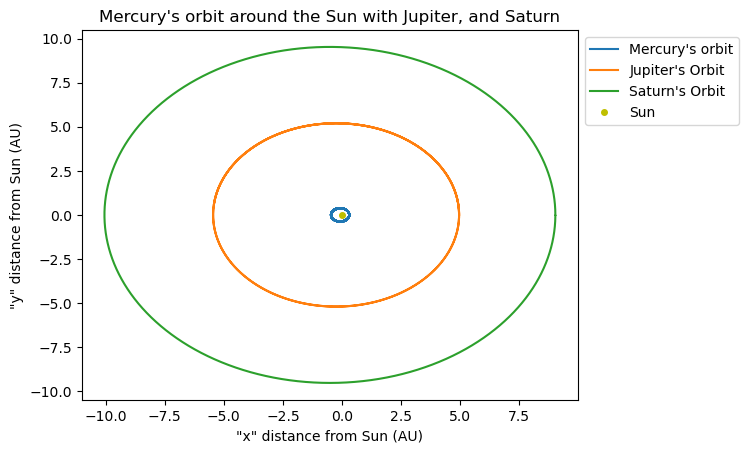

In [23]:
#Plot all orbits, and the Sun
plt.plot(sol2[:,1],sol2[:,3],label="Mercury's orbit")
plt.plot(sol2[:,5],sol2[:,7],label="Jupiter's Orbit")
plt.plot(sol2[:,9],sol2[:,11],label="Saturn's Orbit")
plt.plot(0,0,'yo',markersize=4,label="Sun")

#Label the axes, add title, and legend
plt.xlabel('"x" distance from Sun (AU)')
plt.ylabel('"y" distance from Sun (AU)')
plt.title('Mercury\'s orbit around the Sun with Jupiter, and Saturn')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

In [24]:
#Now add Venus

In [25]:
#Define our function that adds Venus to our previous system
def mbpJSV (r, t, G, Ms, Mj, Mm, Msa, Mv):
    vxm=r[0]
    xm=r[1]
    vym=r[2]
    ym=r[3]
    vxj=r[4]
    xj=r[5]
    vyj=r[6]
    yj=r[7]
    vxs=r[8]
    xs=r[9]
    vys=r[10]
    ys=r[11]
    vxv=r[12]
    xv=r[13]
    vyv=r[14]
    yv=r[15]
    
    
    
    return [(-G*Ms*xm)/(np.sqrt(xm**2+ym**2)**3)-(G*Mj*(xm-xj))/(np.sqrt((xm-xj)**2+(ym-yj)**2)**3)-(G*Msa*(xm-xs))/np.sqrt(((xm-xs)**2+(ym-ys)**2))-(G*Mv*(xm-xv))/np.sqrt(((xm-xv)**2+(ym-yv)**2)),vxm,
           (-G*Ms*ym)/(np.sqrt(xm**2+ym**2)**3)-(G*Mj*(ym-yj))/(np.sqrt((xm-xj)**2+(ym-yj)**2)**3)-(G*Msa*(ym-ys))/np.sqrt(((xm-xs)**2+(ym-ys)**2))-(G*Mv*(ym-yv))/np.sqrt(((xm-xv)**2+(ym-yv)**2)),vym,
           (-G*Ms*xj)/(np.sqrt(xj**2+yj**2)**3),vxj,
           (-G*Ms*yj)/(np.sqrt(xj**2+yj**2)**3),vyj,
           (-G*Ms*xs)/(np.sqrt(xs**2+ys**2)**3),vxs,
           (-G*Ms*ys)/(np.sqrt(xs**2+ys**2)**3),vys,
           (-G*Ms*xv)/(np.sqrt(xv**2+yv**2)**3),vxv,
           (-G*Ms*yv)/(np.sqrt(xv**2+yv**2)**3),vyv]

In [26]:
#Define initial conditions, timesteps, and then solve our system using odeint. Call the solution array sol3
ic1 = (vx0,x0,vy0,y0,vxj0,xj0,vyj0,yj0,vxs0,xs0,vys0,ys0,vxv0,xv0,vyv0,yv0)
t = np.linspace(0,period_saturn,5*steps)
sol3=odeint(mbpJSV,ic1,t,args=(G,m_sun,m_jupiter,m_mercury,m_saturn,m_venus))

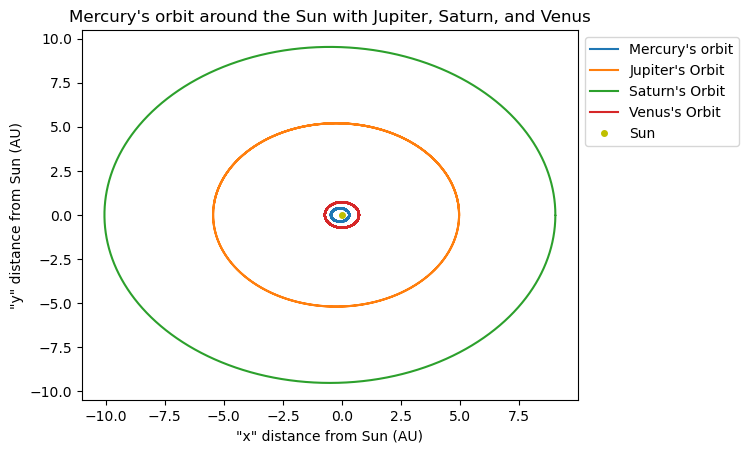

In [27]:
#Plot all orbits, and the Sun
plt.plot(sol3[:,1],sol3[:,3],label="Mercury's orbit")
plt.plot(sol3[:,5],sol3[:,7],label="Jupiter's Orbit")
plt.plot(sol3[:,9],sol3[:,11],label="Saturn's Orbit")
plt.plot(sol3[:,13],sol3[:,15],label="Venus's Orbit")
plt.plot(0,0,'yo',markersize=4,label="Sun")

#Label the axes, add title, and legend
plt.xlabel('"x" distance from Sun (AU)')
plt.ylabel('"y" distance from Sun (AU)')
plt.title('Mercury\'s orbit around the Sun with Jupiter, Saturn, and Venus')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

In [28]:
#Add Earth

In [29]:
#Define a function adding Earth to our previous system
def mbpJSVE (r, t, G, Ms, Mj, Mm, Msa, Mv,Me):
    vxm=r[0]
    xm=r[1]
    vym=r[2]
    ym=r[3]
    vxj=r[4]
    xj=r[5]
    vyj=r[6]
    yj=r[7]
    vxs=r[8]
    xs=r[9]
    vys=r[10]
    ys=r[11]
    vxv=r[12]
    xv=r[13]
    vyv=r[14]
    yv=r[15]
    vxe=r[16]
    xe=r[17]
    vye=r[18]
    ye=r[19]
   
    
    
    
    return [(-G*Ms*xm)/(np.sqrt(xm**2+ym**2)**3)-(G*Mj*(xm-xj))/(np.sqrt((xm-xj)**2+(ym-yj)**2)**3)-(G*Msa*(xm-xs))/(np.sqrt((xm-xs)**2+(ym-ys)**2)**3)-(G*Mv*(xm-xv))/(np.sqrt((xm-xv)**2+(ym-yv)**2)**3)-(G*Me*(xm-xe))/(np.sqrt((xm-xe)**2+(ym-ye)**2)**3),vxm,
           (-G*Ms*ym)/(np.sqrt(xm**2+ym**2)**3)-(G*Mj*(ym-yj))/(np.sqrt((xm-xj)**2+(ym-yj)**2)**3)-(G*Msa*(ym-ys))/(np.sqrt((xm-xs)**2+(ym-ys)**2)**3)-(G*Mv*(ym-yv))/(np.sqrt((xm-xv)**2+(ym-yv)**2)**3)-(G*Me*(ym-ye))/(np.sqrt((xm-xe)**2+(ym-ye)**2)**3),vym,
           (-G*Ms*xj)/(np.sqrt(xj**2+yj**2)**3),vxj,
           (-G*Ms*yj)/(np.sqrt(xj**2+yj**2)**3),vyj,
           (-G*Ms*xs)/(np.sqrt(xs**2+ys**2)**3),vxs,
           (-G*Ms*ys)/(np.sqrt(xs**2+ys**2)**3),vys,
           (-G*Ms*xv)/(np.sqrt(xv**2+yv**2)**3),vxv,
           (-G*Ms*yv)/(np.sqrt(xv**2+yv**2)**3),vyv,
           (-G*Ms*xe)/(np.sqrt(xe**2+ye**2)**3),vxe,
           (-G*Ms*ye)/(np.sqrt(xe**2+ye**2)**3),vye]

In [30]:
##Define initial conditions, timesteps, and then solve our system using odeint. Call the solution array sol4
ic1 = (vx0,x0,vy0,y0,vxj0,xj0,vyj0,yj0,vxs0,xs0,vys0,ys0,vxv0,xv0,vyv0,yv0,vxe0,xe0,vye0,ye0)
t = np.linspace(0,period_saturn,5*steps)
sol4=odeint(mbpJSVE,ic1,t,args=(G,m_sun,m_jupiter,m_mercury,m_saturn,m_venus,m_earth))

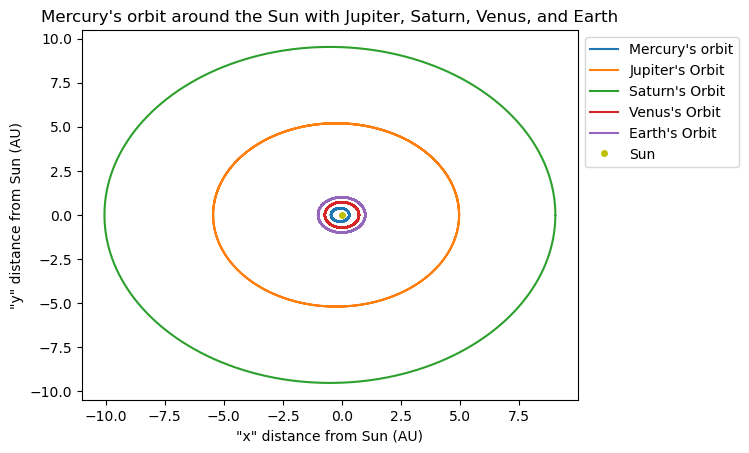

In [31]:
#Plot all orbits, and the Sun
plt.plot(sol4[:,1],sol4[:,3],label="Mercury's orbit")
plt.plot(sol4[:,5],sol4[:,7],label="Jupiter's Orbit")
plt.plot(sol4[:,9],sol4[:,11],label="Saturn's Orbit")
plt.plot(sol4[:,13],sol4[:,15],label="Venus's Orbit")
plt.plot(sol4[:,17],sol4[:,19],label="Earth's Orbit")
plt.plot(0,0,'yo',markersize=4,label="Sun")

#Label the axes, add title, and legend
plt.xlabel('"x" distance from Sun (AU)')
plt.ylabel('"y" distance from Sun (AU)')
plt.title('Mercury\'s orbit around the Sun with Jupiter, Saturn, Venus, and Earth')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

In [32]:
%reset -f 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

#Constants to use throughout the code
#Includes all planetary information, like masses, eccentricity, etc
#Also have number of orbits and steps (per orbit) to control and manipulate in code later
#Also define initial conditions for all planets 
numOrbits=691
steps=50000


G = 6.67430*10**-11*(31536000)**2*(1/149597870691**3)
m_sun = 1.98844*10**30

m_mercury = 3.30104*10**23
period_mercury = .2408425
sma_mercury = 0.387098261 
e_mercury = 0.20563593 

m_jupiter = 1.89813 * 10**27
e_jupiter = 0.04838624
sma_jupiter = 5.20287342
period_jupiter=11.862409

m_saturn=5.68319 * 10**26
period_saturn = 29.446986
e_saturn=0.05386179 
sma_saturn=9.536651047


m_venus=4.86732*10**24
period_venus=0.6151866
e_venus=0.00677672
sma_venus=0.723333771

m_earth=5.97219*10**24
period_earth=1.00
e_earth=0.01671123
sma_earth=1.00

m_mars=6.41693*10**23
period_mars=1.8808149
e_mars=0.0933941
sma_mars=1.523706365

xma0=sma_mars*(1-e_mars)
yma0=0
vxma0=0
vyma0= np.sqrt(((1+e_mars)*G*m_sun)/(xma0))

xe0=sma_earth*(1-e_earth)
ye0=0
vxe0=0
vye0= np.sqrt(((1+e_earth)*G*m_sun)/(xe0))

xv0=sma_venus*(1-e_venus)
yv0=0
vxv0=0
vyv0= np.sqrt(((1+e_venus)*G*m_sun)/(xv0))

xs0=sma_saturn*(1-e_saturn)
ys0=0
vxs0=0
vys0= np.sqrt(((1+e_saturn)*G*m_sun)/(xs0))

xj0=sma_jupiter*(1-e_jupiter)
yj0=0
vxj0=0
vyj0= np.sqrt(((1+e_jupiter)*G*m_sun)/(xj0))

x0 = sma_mercury*(1-e_mercury)
y0 = 0
vx0 = 0
vy0 = np.sqrt(((1+e_mercury)*G*m_sun)/(x0))

#Define perigee tracker peritrack
stepsn=int(steps/2)
def peritrack(a,sol):
    orbit_groupsx=np.array_split(sol[stepsn:-stepsn,1],a-1)
    orbit_groupsy=np.array_split(sol[stepsn:-stepsn,3],a-1)
    x_min = 0
    y_min = 0 
    x_perigee = []
    y_perigee = []
    x_perigee.append(sol[0,1])
    y_perigee.append(sol[0,3])
    for j in range(a-1):
        min_dis=sma_mercury
        arrayx=orbit_groupsx[j]
        arrayy=orbit_groupsy[j]
        for i in range(len(arrayx)):
            if (min_dis > np.sqrt(arrayx[i]**2+arrayy[i]**2)): 
                min_dis=np.sqrt(arrayx[i]**2+arrayy[i]**2)
                x_min=arrayx[i]
                y_min=arrayy[i]
        x_perigee.append(x_min)
        y_perigee.append(y_min)
    perigee=np.column_stack((x_perigee,y_perigee))  
    return perigee  

In [34]:
#Add our final planet, Mars

In [35]:
#Create a function to add Mars to our system, our last planet
def mbpJSVEM (r, t, G, Ms, Mj, Mm, Msa, Mv, Me, Mma):
    vxm=r[0]
    xm=r[1]
    vym=r[2]
    ym=r[3]
    vxj=r[4]
    xj=r[5]
    vyj=r[6]
    yj=r[7]
    vxs=r[8]
    xs=r[9]
    vys=r[10]
    ys=r[11]
    vxv=r[12]
    xv=r[13]
    vyv=r[14]
    yv=r[15]
    vxe=r[16]
    xe=r[17]
    vye=r[18]
    ye=r[19]
    vxma=r[20]
    xma=r[21]
    vyma=r[22]
    yma=r[23]
    
    
    
    return [(-G*Ms*xm)/(np.sqrt(xm**2+ym**2)**3)-(G*Mj*(xm-xj))/(np.sqrt((xm-xj)**2+(ym-yj)**2)**3)-(G*Msa*(xm-xs))/(np.sqrt((xm-xs)**2+(ym-ys)**2)**3)-(G*Mv*(xm-xv))/(np.sqrt((xm-xv)**2+(ym-yv)**2)**3)-(G*Me*(xm-xe))/(np.sqrt((xm-xe)**2+(ym-ye)**2)**3)-(G*Mma*(xm-xma))/(np.sqrt((xm-xma)**2+(ym-yma)**2)**3),vxm,
           (-G*Ms*ym)/(np.sqrt(xm**2+ym**2)**3)-(G*Mj*(ym-yj))/(np.sqrt((xm-xj)**2+(ym-yj)**2)**3)-(G*Msa*(ym-ys))/(np.sqrt((xm-xs)**2+(ym-ys)**2)**3)-(G*Mv*(ym-yv))/(np.sqrt((xm-xv)**2+(ym-yv)**2)**3)-(G*Me*(ym-ye))/(np.sqrt((xm-xe)**2+(ym-ye)**2)**3)-(G*Mma*(ym-yma))/(np.sqrt((xm-xma)**2+(ym-yma)**2)**3),vym,
           (-G*Ms*xj)/(np.sqrt(xj**2+yj**2)**3),vxj,
           (-G*Ms*yj)/(np.sqrt(xj**2+yj**2)**3),vyj,
           (-G*Ms*xs)/(np.sqrt(xs**2+ys**2)**3),vxs,
           (-G*Ms*ys)/(np.sqrt(xs**2+ys**2)**3),vys,
           (-G*Ms*xv)/(np.sqrt(xv**2+yv**2)**3),vxv,
           (-G*Ms*yv)/(np.sqrt(xv**2+yv**2)**3),vyv,
           (-G*Ms*xe)/(np.sqrt(xe**2+ye**2)**3),vxe,
           (-G*Ms*ye)/(np.sqrt(xe**2+ye**2)**3),vye,
           (-G*Ms*xma)/(np.sqrt(xma**2+yma**2)**3),vxma,
           (-G*Ms*yma)/(np.sqrt(xma**2+yma**2)**3),vyma]

In [36]:
#Define intitial condtions and time steps. Solve the system using odeint. Call the solution array sol5.
ic1 = (vx0,x0,vy0,y0,vxj0,xj0,vyj0,yj0,vxs0,xs0,vys0,ys0,vxv0,xv0,vyv0,yv0,vxe0,xe0,vye0,ye0,vxma0,xma0,vyma0,yma0)
t = np.linspace(0,period_saturn,5*steps)
sol5=odeint(mbpJSVEM,ic1,t,args=(G,m_sun,m_jupiter,m_mercury,m_saturn,m_venus,m_earth,m_mars))

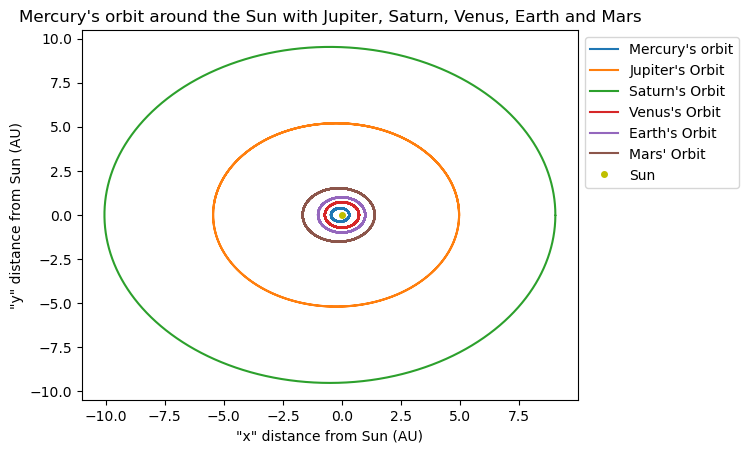

In [37]:
#Plot all orbits, and the Sun
plt.plot(sol5[:,1],sol5[:,3],label="Mercury's orbit")
plt.plot(sol5[:,5],sol5[:,7],label="Jupiter's Orbit")
plt.plot(sol5[:,9],sol5[:,11],label="Saturn's Orbit")
plt.plot(sol5[:,13],sol5[:,15],label="Venus's Orbit")
plt.plot(sol5[:,17],sol5[:,19],label="Earth's Orbit")
plt.plot(sol5[:,21],sol5[:,23],label="Mars' Orbit")
plt.plot(0,0,'yo',markersize=4,label="Sun")


#Label the axes, add title, and legend
plt.xlabel('"x" distance from Sun (AU)')
plt.ylabel('"y" distance from Sun (AU)')
plt.title('Mercury\'s orbit around the Sun with Jupiter, Saturn, Venus, Earth and Mars')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

In [38]:
#Define new time in order to track perigee and resolve system. The time above was needed in order
#to plot efficiently
ic1 = (vx0,x0,vy0,y0,vxj0,xj0,vyj0,yj0,vxs0,xs0,vys0,ys0,vxv0,xv0,vyv0,yv0,vxe0,xe0,vye0,ye0,vxma0,xma0,vyma0,yma0)
t = np.linspace(0,numOrbits*period_mercury,numOrbits*steps)
sol5=odeint(mbpJSVEM,ic1,t,args=(G,m_sun,m_jupiter,m_mercury,m_saturn,m_venus,m_earth,m_mars))

In [39]:
#Now use our perigee tracker to track the perigees in this system with all the planets
perigees=peritrack(numOrbits,sol5)

In [40]:
#Now convert our perigees to angles (in arcseconds) just as above with just Mercury
angles=np.degrees((np.arctan2(perigees[:,1],perigees[:,0])))*3600

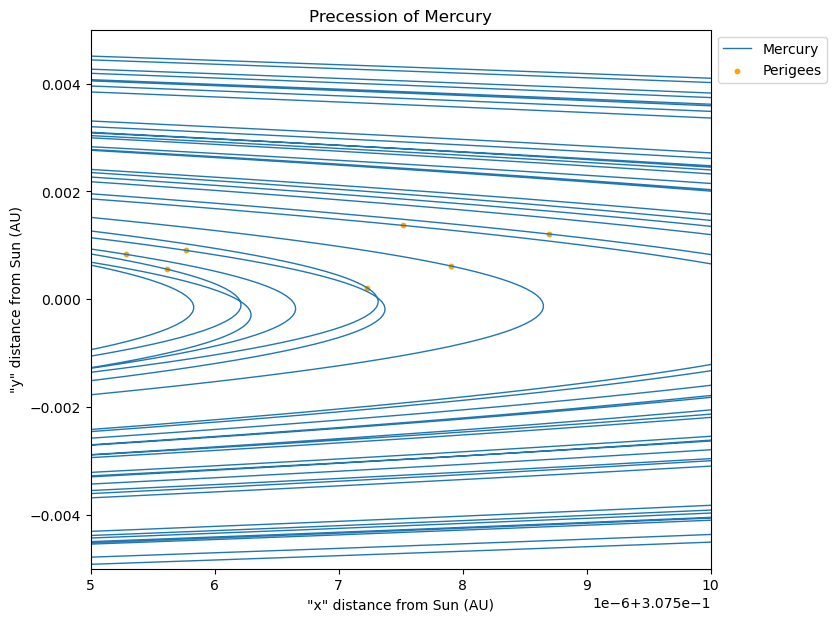

Precession rate per century = 530.0643562298881


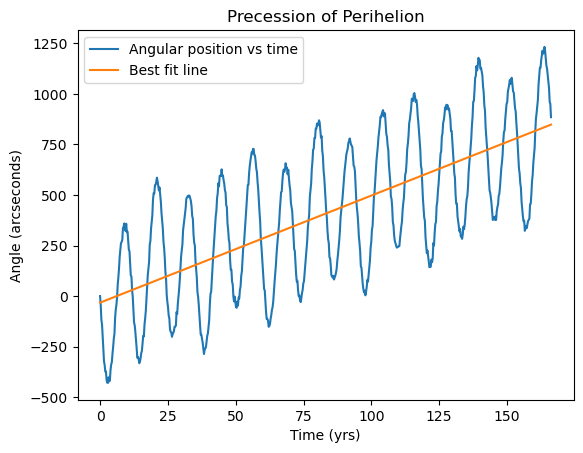

In [41]:
#Plot zoomed in orbit showing precession
plt.figure(figsize=(8,7))
plt.plot(sol5[:,1],sol5[:,3],label="Mercury",linewidth=1)
plt.scatter(perigees[:,0],perigees[:,1],c='orange',s=10,label='Perigees')
plt.xlim(.307505,.30751)
plt.ylim(-.005,.005)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.xlabel('"x" distance from Sun (AU)')
plt.ylabel('"y" distance from Sun (AU)')
plt.title("Precession of Mercury")
plt.show()

#Now plot our perigees vs time

#Make time steps corresponding to sucessive periods of Mercury just as before
t1 = np.zeros(numOrbits)
for i in range (numOrbits):
    t1[i] = period_mercury*i

    
#Now find the best fit line and plot both.
plt.plot(t1,angles,label='Angular position vs time')
c,b=np.polyfit(t1,angles,1)
plt.plot(t1, c * t1 + b,label='Best fit line')

# Add title, axes labels, and legend
plt.title('Precession of Perihelion')
plt.xlabel('Time (yrs)')
plt.ylabel('Angle (arcseconds)')
plt.legend()

# Print the slope times 100, which will give precession per century, since the slope is precession per year
print('Precession rate per century = '+str(c * 100))

# Display the plot
plt.show()

Part C: General Relativity

In [42]:
%reset -f

In [43]:
#Import needed modules/libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

#Constants to use throughout the code
#Includes all planetary information, like masses, eccentricity, etc
#Also have number of orbits and steps (per orbit) to control and manipulate in code later
#Also define initial conditions for all planets 
numOrbits=691
steps=50000


G = 6.67430*10**-11*(31536000)**2*(1/149597870691**3)
m_sun = 1.98844*10**30

m_mercury = 3.30104*10**23
period_mercury = .2408425
sma_mercury = 0.387098261 
e_mercury = 0.20563593 

m_jupiter = 1.89813 * 10**27
e_jupiter = 0.04838624
sma_jupiter = 5.20287342
period_jupiter=11.862409

m_saturn=5.68319 * 10**26
period_saturn = 29.446986
e_saturn=0.05386179 
sma_saturn=9.536651047


m_venus=4.86732*10**24
period_venus=0.6151866
e_venus=0.00677672
sma_venus=0.723333771

m_earth=5.97219*10**24
period_earth=1.00
e_earth=0.01671123
sma_earth=1.00

m_mars=6.41693*10**23
period_mars=1.8808149
e_mars=0.0933941
sma_mars=1.523706365

xma0=sma_mars*(1-e_mars)
yma0=0
vxma0=0
vyma0= np.sqrt(((1+e_mars)*G*m_sun)/(xma0))

xe0=sma_earth*(1-e_earth)
ye0=0
vxe0=0
vye0= np.sqrt(((1+e_earth)*G*m_sun)/(xe0))

xv0=sma_venus*(1-e_venus)
yv0=0
vxv0=0
vyv0= np.sqrt(((1+e_venus)*G*m_sun)/(xv0))

xs0=sma_saturn*(1-e_saturn)
ys0=0
vxs0=0
vys0= np.sqrt(((1+e_saturn)*G*m_sun)/(xs0))

xj0=sma_jupiter*(1-e_jupiter)
yj0=0
vxj0=0
vyj0= np.sqrt(((1+e_jupiter)*G*m_sun)/(xj0))

x0 = sma_mercury*(1-e_mercury)
y0 = 0
vx0 = 0
vy0 = np.sqrt(((1+e_mercury)*G*m_sun)/(x0))

#Define perigee tracker peritrack
stepsn=int(steps/2)
def peritrack(a,sol):
    orbit_groupsx=np.array_split(sol[stepsn:-stepsn,1],a-1)
    orbit_groupsy=np.array_split(sol[stepsn:-stepsn,3],a-1)
    x_min = 0
    y_min = 0 
    x_perigee = []
    y_perigee = []
    x_perigee.append(sol[0,1])
    y_perigee.append(sol[0,3])
    for j in range(a-1):
        min_dis=sma_mercury
        arrayx=orbit_groupsx[j]
        arrayy=orbit_groupsy[j]
        for i in range(len(arrayx)):
            if (min_dis > np.sqrt(arrayx[i]**2+arrayy[i]**2)): 
                min_dis=np.sqrt(arrayx[i]**2+arrayy[i]**2)
                x_min=arrayx[i]
                y_min=arrayy[i]
        x_perigee.append(x_min)
        y_perigee.append(y_min)
    perigee=np.column_stack((x_perigee,y_perigee))  
    return perigee  

In [44]:
#Now add the planets with relativity

In [45]:
#Now define our function that gives the system of ODE's including general relativity that will be used by odeint
def mbpJSVEMR (r, t, G, Ms, Mj, Mm, Msa, Mv, Me, Mma,a):
    vxm=r[0]
    xm=r[1]
    vym=r[2]
    ym=r[3]
    vxj=r[4]
    xj=r[5]
    vyj=r[6]
    yj=r[7]
    vxs=r[8]
    xs=r[9]
    vys=r[10]
    ys=r[11]
    vxv=r[12]
    xv=r[13]
    vyv=r[14]
    yv=r[15]
    vxe=r[16]
    xe=r[17]
    vye=r[18]
    ye=r[19]
    vxma=r[20]
    xma=r[21]
    vyma=r[22]
    yma=r[23]
    
    
    
    return [(-G*Ms*xm)/(np.sqrt(xm**2+ym**2)**3)*(1+a/(xm**2+ym**2))-(G*Mj*(xm-xj))/(np.sqrt((xm-xj)**2+(ym-yj)**2)**3)-(G*Msa*(xm-xs))/(np.sqrt((xm-xs)**2+(ym-ys)**2)**3)-(G*Mv*(xm-xv))/(np.sqrt((xm-xv)**2+(ym-yv)**2)**3)-(G*Me*(xm-xe))/(np.sqrt((xm-xe)**2+(ym-ye)**2)**3)-(G*Mma*(xm-xma))/(np.sqrt((xm-xma)**2+(ym-yma)**2)**3),vxm,
           (-G*Ms*ym)/(np.sqrt(xm**2+ym**2)**3)*(1+a/(xm**2+ym**2))-(G*Mj*(ym-yj))/(np.sqrt((xm-xj)**2+(ym-yj)**2)**3)-(G*Msa*(ym-ys))/(np.sqrt((xm-xs)**2+(ym-ys)**2)**3)-(G*Mv*(ym-yv))/(np.sqrt((xm-xv)**2+(ym-yv)**2)**3)-(G*Me*(ym-ye))/(np.sqrt((xm-xe)**2+(ym-ye)**2)**3)-(G*Mma*(ym-yma))/(np.sqrt((xm-xma)**2+(ym-yma)**2)**3),vym,
           (-G*Ms*xj)/(np.sqrt(xj**2+yj**2)**3),vxj,
           (-G*Ms*yj)/(np.sqrt(xj**2+yj**2)**3),vyj,
           (-G*Ms*xs)/(np.sqrt(xs**2+ys**2)**3),vxs,
           (-G*Ms*ys)/(np.sqrt(xs**2+ys**2)**3),vys,
           (-G*Ms*xv)/(np.sqrt(xv**2+yv**2)**3),vxv,
           (-G*Ms*yv)/(np.sqrt(xv**2+yv**2)**3),vyv,
           (-G*Ms*xe)/(np.sqrt(xe**2+ye**2)**3),vxe,
           (-G*Ms*ye)/(np.sqrt(xe**2+ye**2)**3),vye,
           (-G*Ms*xma)/(np.sqrt(xma**2+yma**2)**3),vxma,
           (-G*Ms*yma)/(np.sqrt(xma**2+yma**2)**3),vyma]

In [46]:
#Define the value of alpha
a=1.1*10**-8

#Now define initial condtions and a time step then run odeint with our defined function from above. 
#Define solution array as solR
#Note our timestep here again as above is just for plotting. 
icR = (vx0,x0,vy0,y0,vxj0,xj0,vyj0,yj0,vxs0,xs0,vys0,ys0,vxv0,xv0,vyv0,yv0,vxe0,xe0,vye0,ye0,vxma0,xma0,vyma0,yma0)
t = np.linspace(0,period_saturn,5*steps)
solR=odeint(mbpJSVEMR,icR,t,args=(G,m_sun,m_jupiter,m_mercury,m_saturn,m_venus,m_earth,m_mars,a))

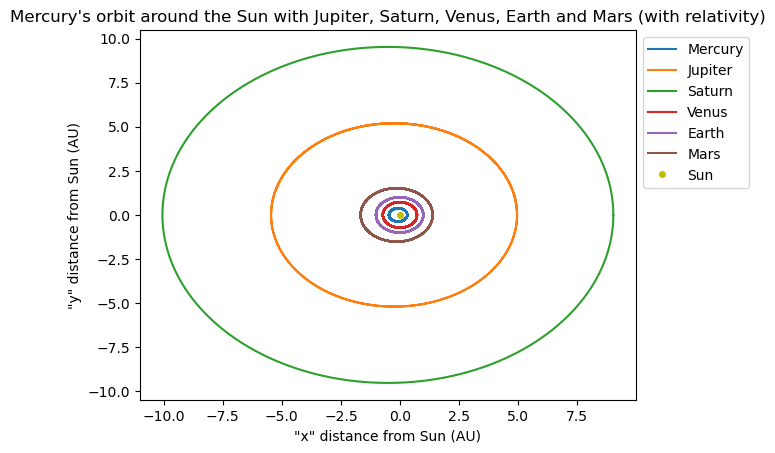

In [47]:
#Plot all orbits, and the Sun
plt.plot(solR[:,1],solR[:,3],label="Mercury")
plt.plot(solR[:,5],solR[:,7],label="Jupiter")
plt.plot(solR[:,9],solR[:,11],label="Saturn")
plt.plot(solR[:,13],solR[:,15],label="Venus")
plt.plot(solR[:,17],solR[:,19],label="Earth")
plt.plot(solR[:,21],solR[:,23],label="Mars")
plt.plot(0,0,'yo',markersize=4,label="Sun")

#Label the axes, add title, and legend
plt.xlabel('"x" distance from Sun (AU)')
plt.ylabel('"y" distance from Sun (AU)')
plt.title('Mercury\'s orbit around the Sun with Jupiter, Saturn, Venus, Earth and Mars (with relativity)')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

In [48]:
#Define time step to be used to track perigee over a large amount of time
t = np.linspace(0,numOrbits*period_mercury,numOrbits*steps)
solR=odeint(mbpJSVEMR,icR,t,args=(G,m_sun,m_jupiter,m_mercury,m_saturn,m_venus,m_earth,m_mars,a))

In [49]:
#Track the perigees for the relativistiv system
perigeesr=peritrack(numOrbits,solR)

In [50]:
#Convert perigee values to angles in arcseconds
anglesR=np.degrees((np.arctan2(perigeesr[:,1],perigeesr[:,0])))*3600

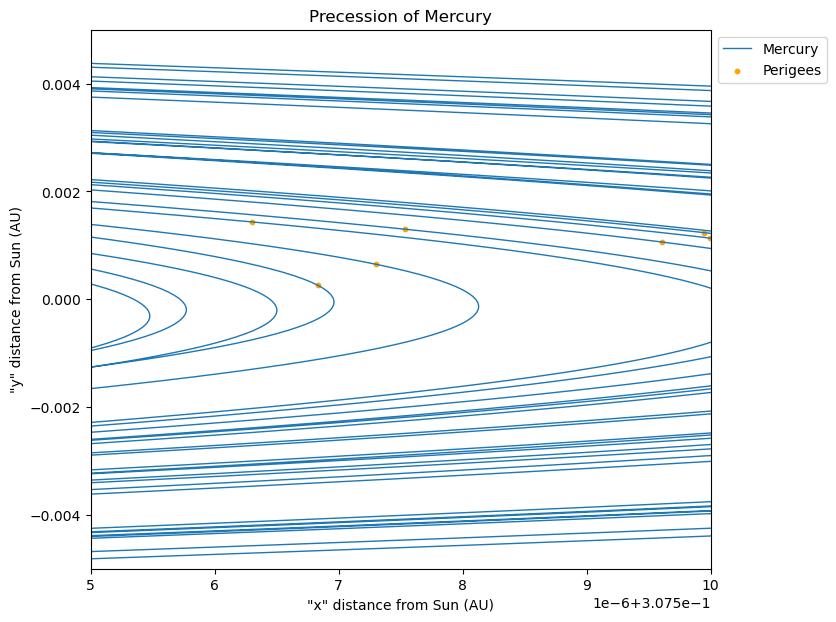

Precession rate per century = 575.8335633725609


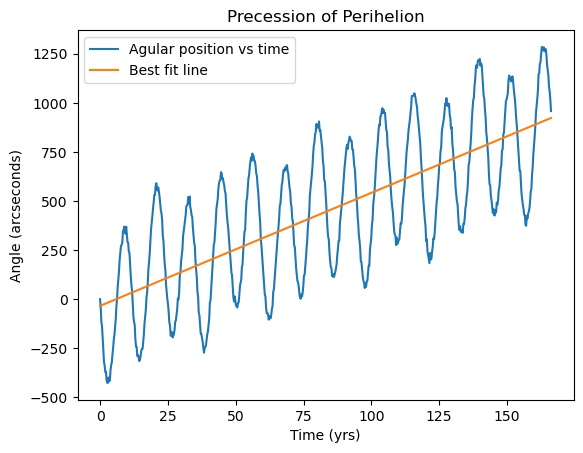

In [51]:
#Plot zoomed in orbit showing precession
plt.figure(figsize=(8,7))
plt.plot(solR[:,1],solR[:,3],label="Mercury",linewidth=1)
plt.scatter(perigeesr[:,0],perigeesr[:,1],c='orange',s=10,label='Perigees')
plt.xlim(.307505,.30751)
plt.ylim(-.005,.005)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.xlabel('"x" distance from Sun (AU)')
plt.ylabel('"y" distance from Sun (AU)')
plt.title("Precession of Mercury")
plt.show()


#Just as before, define time steps, take best fit line, and plot the angles versus time, 
#along with best fit line
t1 = np.zeros(numOrbits)
for i in range (numOrbits):
    t1[i] = period_mercury*i


plt.plot(t1,anglesR,label='Agular position vs time')
c,b=np.polyfit(t1,anglesR,1)
plt.plot(t1, c * t1 + b,label='Best fit line')

# Add title, axes labels, and legend
plt.title('Precession of Perihelion')
plt.xlabel('Time (yrs)')
plt.ylabel('Angle (arcseconds)')
plt.legend()

# Print the slope times 100, which will give precession per century, since the slope is precession per year
print('Precession rate per century = '+str(c * 100))

# Display the plot
plt.show()